<a href="https://colab.research.google.com/github/woodstone10/deep_learning_study-python/blob/main/Vanishing_Gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vanishing Gradients problem

---

Comparison between Activation algorithms:
- sigmoid with standard deviation 1
- sigmoid with standard deviation 0.01
- sigmoid with xavier
- relu with xavier
- relu with he

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Activation algorithms in perceptron of Neural network

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def ReLU(x):
    return np.maximum(0, x)

## Data

In [ ]:
input_data = np.random.randn(1000, 100)  # input data, num of size 1000
node_num = 100  # num of node (Neuran) on each hidden layer
hidden_layer_size = 5  # num of hidden layer
hidden_output = {}  # save of activation function result
gaussian = np.random.randn(node_num, node_num)

In [ ]:
def ShowVanishingGradients(algo, pos): # algorithm, position of picture
  for i, a in hidden_output.items():
    plt.subplot(5, len(hidden_output), pos+i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0:
        plt.yticks([], [])
    plt.xlim(0.1, 1)
    plt.ylim(0, 10000)
    plt.ylabel(algo)
    plt.hist(a.flatten(), 30, range=(0, 1))

In [ ]:
def ActivationNeuralNetwork(algo, stdDev):
  x = input_data
  for i in range(hidden_layer_size):
    if i != 0:
        x = hidden_output[i-1]
    w = gaussian * stdDev
    ws = np.dot(x, w)
    if algo == 'sigmoid':
        hData = sigmoid(ws)
    if algo == 'tanh':
        hData = tanh(ws)
    if algo == 'relu':
        hData = ReLU(ws)
    hidden_output[i] = hData

## Comparison of activation algorithms

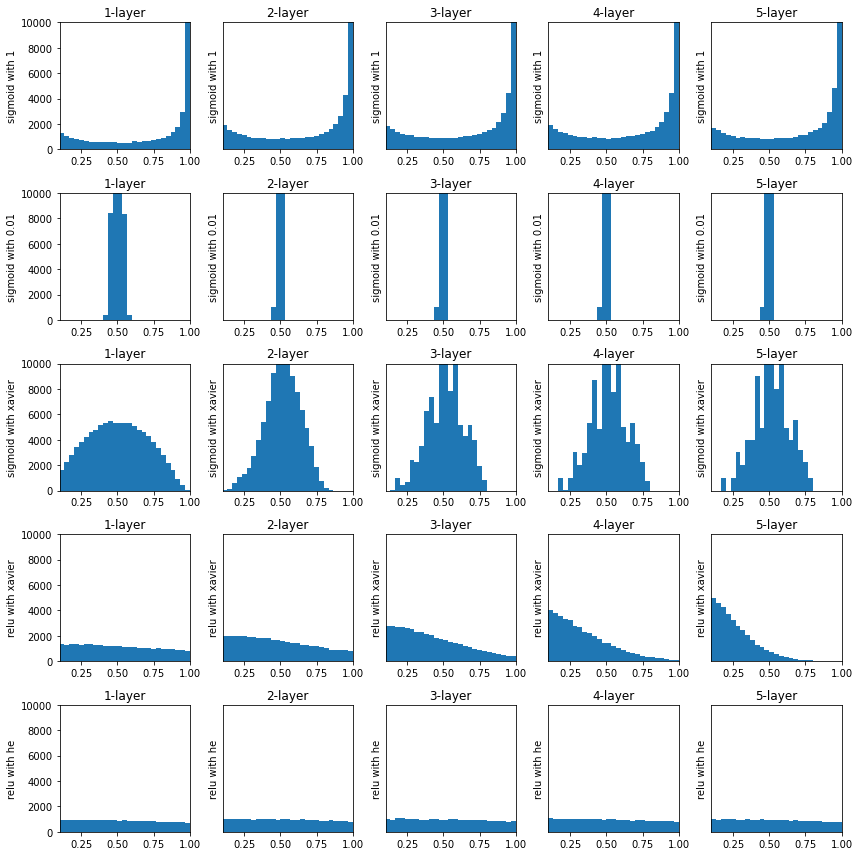

In [ ]:
plt.figure(figsize=(12,12))

# sigmoid with standard deviation 1
ActivationNeuralNetwork('sigmoid', 1)
ShowVanishingGradients('sigmoid with 1', hidden_layer_size*0)

# sigmoid with standard deviation 0.01
ActivationNeuralNetwork('sigmoid', 0.01)
ShowVanishingGradients('sigmoid with 0.01', hidden_layer_size*1)
xavier = np.sqrt(1.0 / node_num)

# sigmoid with xavier
ActivationNeuralNetwork('sigmoid', xavier)
ShowVanishingGradients('sigmoid with xavier', hidden_layer_size*2)

# relu with xavier
ActivationNeuralNetwork('relu', xavier)
ShowVanishingGradients('relu with xavier', hidden_layer_size*3)

# relu with he
he = np.sqrt(2.0 / node_num)
ActivationNeuralNetwork('relu', he)
ShowVanishingGradients('relu with he', hidden_layer_size*4)

plt.tight_layout()
plt.show()